In [1]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [2]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [5]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
                SELECT ct.type, count(ct.type) as count FROM comp_type ct, company_info co
                WHERE (ct.comp_type_id = co.comp_type_id) AND ct.type != "기타" AND ct.comp_type_id != 11 AND ct.type NOT LIKE "%코스%"
                GROUP BY ct.type    
""")
result = cursor.fetchall()

df = pd.DataFrame(result)

df.columns = ["기업분류", "수"]

df

,기업분류,수
0,대기업,5
1,중견기업,9
2,중소기업,197
3,스타트업,26
4,벤처기업,17
5,강소기업,20
6,공기업,2


In [6]:
df.drop(index=6, inplace= True)

df.reset_index(drop=True)

df

,기업분류,수
0,대기업,5
1,중견기업,9
2,중소기업,197
3,스타트업,26
4,벤처기업,17
5,강소기업,20


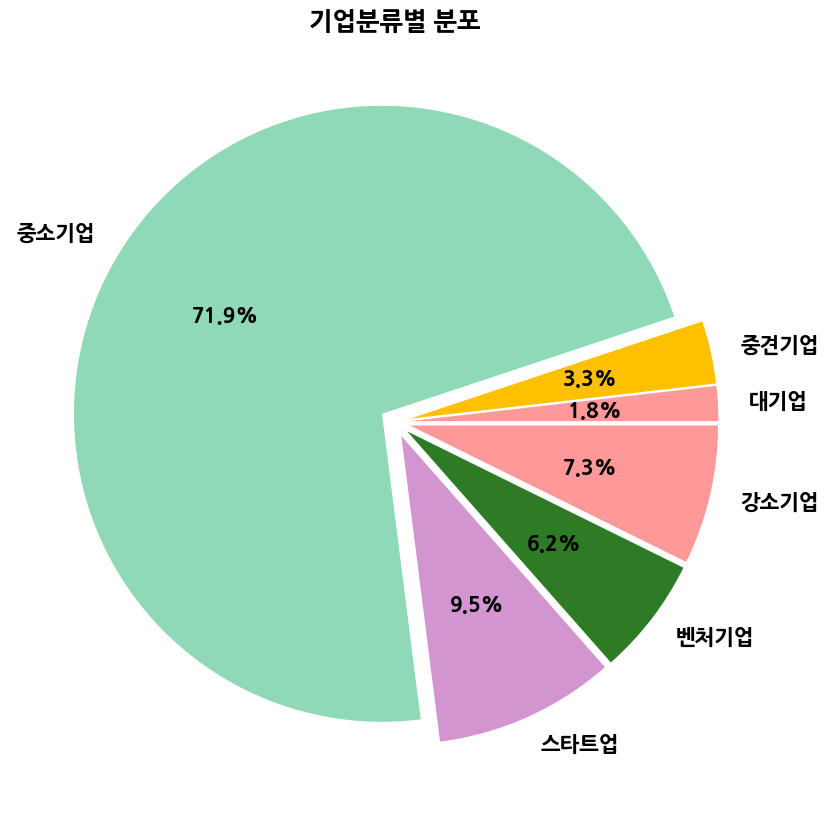

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import pandas as pd


# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 경로 확인 필수
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 그래프 크기 설정
plt.figure(figsize=(10, 10))

# 파이차트 색상 및 explode 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#2E7B26"]
explode = [0.05] * len(df["수"])  # 각 항목을 분리

# 파이차트 생성
plt.pie(
    df["수"],
    labels=df["기업분류"],
    autopct="%.1f%%",  # 퍼센트 표시
    explode=explode,  # 각 항목 분리
    colors=colors,
    textprops={'fontsize': 15, 'fontweight': 'bold'}  # 텍스트 크기 및 굵기 설정
)

# 그래프 제목 추가
plt.title("기업분류별 분포", fontsize=18, fontweight='bold')

# 그래프 표시
plt.show()


In [1]:
remote.close()

NameError: name 'remote' is not defined